In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
def plot_dataframe_columns_with_secondary_y(df, x_column, y1_column, y2_column):
    _, ax1 = plt.subplots(figsize=(15, 6))

    # Plotting on the primary y-axis
    ax1.plot(df[x_column], df[y1_column], marker='.', color='blue', linestyle='--')
    ax1.set_xlabel(x_column)
    ax1.set_ylabel(y1_column, color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Creating a secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(df[x_column], df[y2_column], marker='x', color='green', linestyle='--')
    ax2.set_ylabel(y2_column, color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    plt.title(f"Plot of {y1_column} and {y2_column} vs {x_column}")
    plt.grid(True)
    plt.show()

In [4]:
nav_df = pd.read_excel(r'C:\Users\chris\trade\curr_pos\vanguard\vg_nav_data\EDV_nav_prices.xlsx', parse_dates=['date'])
nav_df = nav_df[nav_df['date'] > pd.to_datetime(datetime(2023, 1, 1))]
nav_df = nav_df.rename(columns={'date': 'Date'})
nav_df.head()

,Date,navPrice
3796,2023-01-03,$84.38
3797,2023-01-04,$85.94
3798,2023-01-05,$86.56
3799,2023-01-06,$88.54
3800,2023-01-09,$89.19


In [5]:
yields_df = pd.read_excel(r'C:\Users\chris\trade\curr_pos\treasuries\2023_daily_treasury_rates.xlsx', parse_dates=['Date'])
yields_df.head()

,Date,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-11-10,5.53,5.55,5.53,5.47,5.46,5.38,5.04,4.80,4.65,4.68,4.61,4.93,4.73
1,2023-11-09,5.53,5.56,5.54,5.50,5.46,5.39,5.03,4.77,4.65,4.68,4.62,4.97,4.77
2,2023-11-08,5.52,5.54,5.54,5.49,5.46,5.34,4.93,4.65,4.51,4.54,4.49,4.82,4.64
3,2023-11-07,5.53,5.56,5.55,5.48,5.47,5.33,4.91,4.64,4.53,4.58,4.58,4.91,4.75
4,2023-11-06,5.53,5.56,5.56,5.49,5.47,5.33,4.93,4.72,4.60,4.66,4.67,5.00,4.84


In [6]:
df = nav_df.merge(yields_df)
df["navPrice"] = df["navPrice"].str.replace("$", "")
df["navPrice"] = df["navPrice"].str.replace(",", "")
df["navPrice"] = df["navPrice"].astype("float")
df.head()

C:\Users\chris\AppData\Local\Temp\ipykernel_15820\2019368011.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["navPrice"] = df["navPrice"].str.replace("$", "")


,Date,navPrice,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
0,2023-01-03,84.38,4.17,4.42,4.53,4.70,4.77,4.72,4.40,4.18,3.94,3.89,3.79,4.06,3.88
1,2023-01-04,85.94,4.20,4.42,4.55,4.69,4.77,4.71,4.36,4.11,3.85,3.79,3.69,3.97,3.81
2,2023-01-05,86.56,4.30,4.55,4.66,4.75,4.81,4.78,4.45,4.18,3.90,3.82,3.71,3.96,3.78
3,2023-01-06,88.54,4.32,4.55,4.67,4.74,4.79,4.71,4.24,3.96,3.69,3.63,3.55,3.84,3.67
4,2023-01-09,89.19,4.37,4.58,4.70,4.74,4.83,4.69,4.19,3.93,3.66,3.60,3.53,3.83,3.66


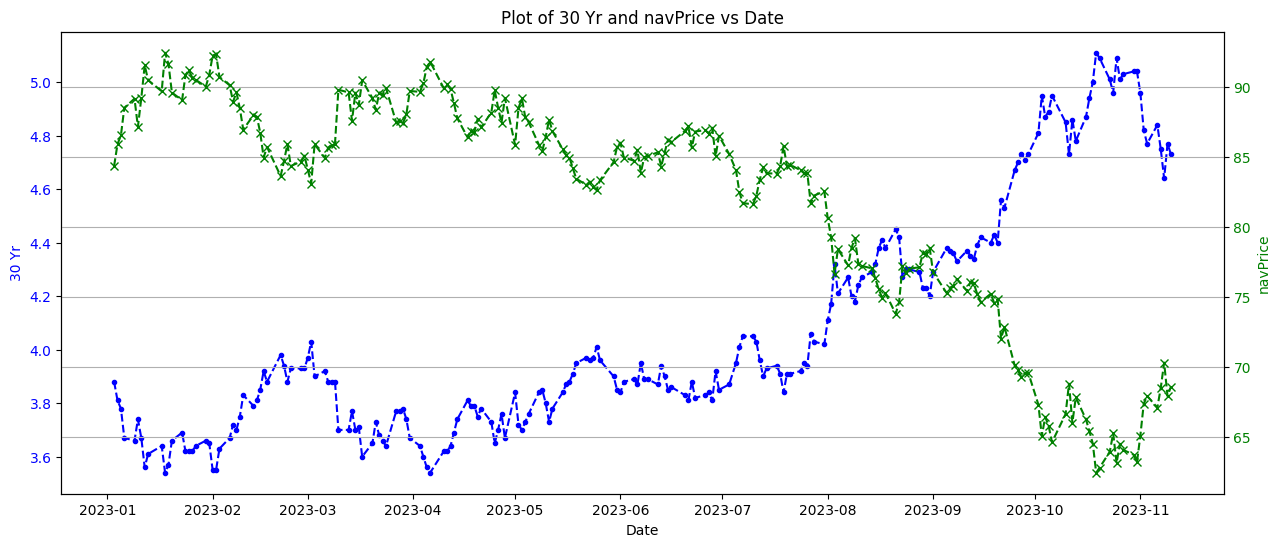

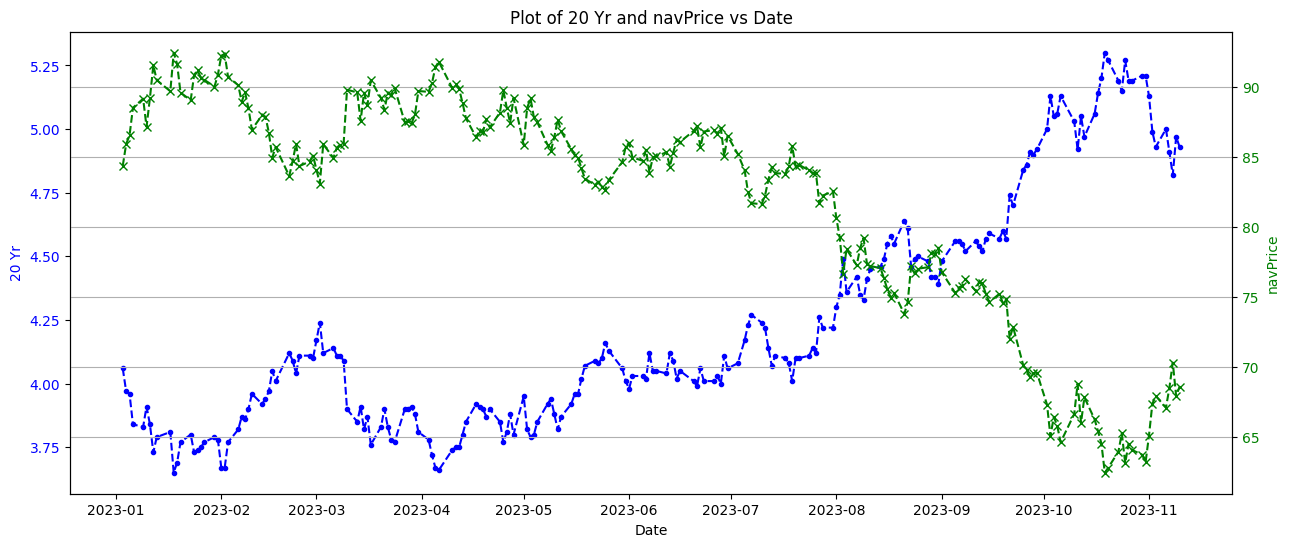

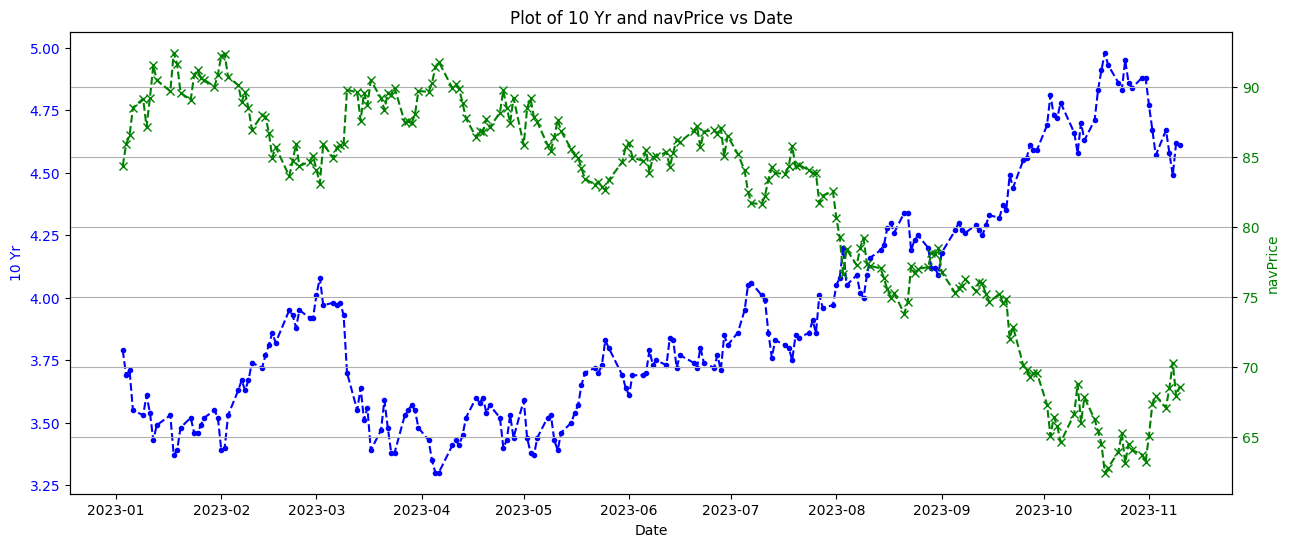

In [7]:
plot_dataframe_columns_with_secondary_y(df, 'Date', '30 Yr', 'navPrice')
plot_dataframe_columns_with_secondary_y(df, 'Date', '20 Yr', 'navPrice')
plot_dataframe_columns_with_secondary_y(df, 'Date', '10 Yr', 'navPrice')

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


yields_df['2s10s'] = yields_df['10 Yr'] - yields_df['2 Yr']
yields_df['5s30s'] = yields_df['30 Yr'] - yields_df['5 Yr']

spreads = yields_df[['2s10s', '5s30s']]

scaler = StandardScaler()
spreads_standardized = scaler.fit_transform(spreads)

pd.DataFrame(spreads_standardized, columns=['2s10s', '5s30s']).head()

,2s10s,5s30s
0,1.051708,0.350047
1,1.145645,0.581810
2,1.004739,0.639751
3,1.521394,1.161217
4,1.850175,1.277099


In [12]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(spreads_standardized)
principal_components_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
combined_data = pd.concat([yields_df['Date'], principal_components_df], axis=1)
combined_data.head(), pca.explained_variance_ratio_

(        Date       PC1       PC2
 0 2023-11-10 -0.991191 -0.496149
 1 2023-11-09 -1.221495 -0.398692
 2 2023-11-08 -1.162830 -0.258086
 3 2023-11-07 -1.896893 -0.254684
 4 2023-11-06 -2.211316 -0.405226,
 array([0.9106893, 0.0893107]))

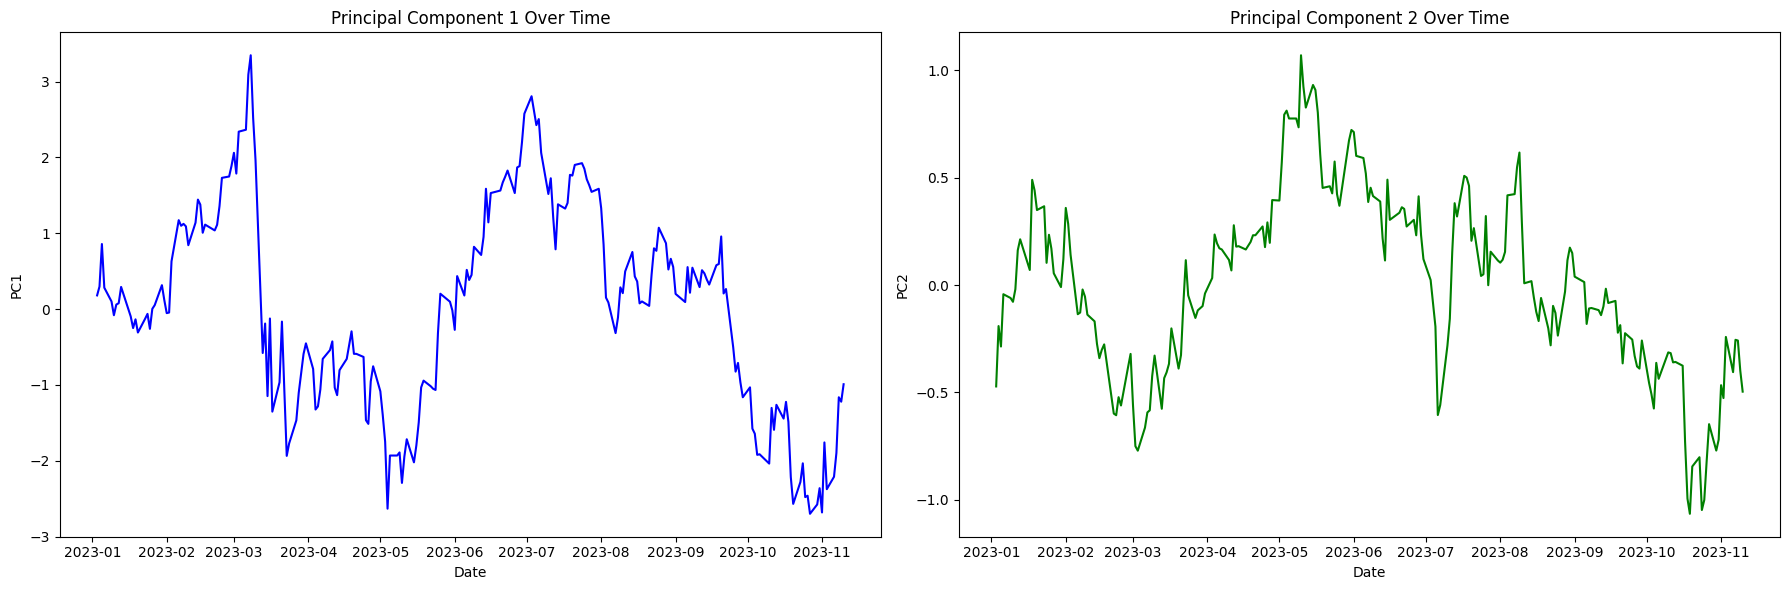

In [14]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.plot(combined_data['Date'], combined_data['PC1'], color='blue')
plt.title('Principal Component 1 Over Time')
plt.xlabel('Date')
plt.ylabel('PC1')

plt.subplot(1, 2, 2)
plt.plot(combined_data['Date'], combined_data['PC2'], color='green')
plt.title('Principal Component 2 Over Time')
plt.xlabel('Date')
plt.ylabel('PC2')

plt.tight_layout()
plt.show()